In [1]:
!pip install kaggle

In [2]:
import json
from pathlib import Path
def rtouch(self,mode=0o666,exist_ok=True):
    self.parent.mkdir(parents=True,exist_ok=True)
    self.touch(mode,exist_ok)
setattr(Path,'rtouch',rtouch)

In [23]:
home_directory=Path('/home/userdirectory')
kaggle_username="kaggleUsername"
kaggle_key="kaggle api key"

In [24]:
p=home_directory/'.kaggle/kaggle.json'
p.rtouch(mode=0o700)

PermissionError: [Errno 13] Permission denied: '/home/userdirectory'

In [25]:
p.write_text(json.dumps({"username":kaggle_username,"key":kaggle_key}))
json.loads(p.read_text())

FileNotFoundError: [Errno 2] No such file or directory: '/home/userdirectory/.kaggle/kaggle.json'

In [6]:
import kaggle

In [7]:
kaggle.api.competition_download_files('state-farm-distracted-driver-detection',path=home_directory/'.fastai/data/distracted-drivers',quiet=False)

state-farm-distracted-driver-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from fastai2.data.external import *
from fastai2.vision.all import *
from math import isclose
import pandas as pd

In [9]:
file_extract(home_directory/'.fastai/data/distracted-drivers/state-farm-distracted-driver-detection.zip')

In [10]:
table=pd.read_csv(home_directory/'.fastai/data/distracted-drivers/driver_imgs_list.csv')
table

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [29]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(480),
                 batch_tfms=aug_transforms())
dls = db.dataloaders(home_directory/'.fastai/data/distracted-drivers/imgs/train',verbose=True,bs=8)
dls.show_batch()

TypeError: 'NoneType' object is not iterable

In [26]:
aug_transforms??

In [12]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

(1.9054606673307718e-05, 3.6307804407442745e-07)

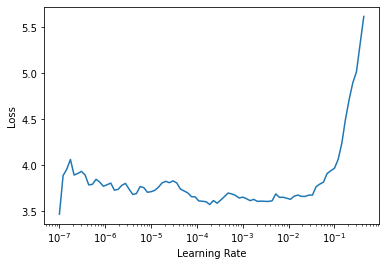

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.268226,0.089474,0.027431,08:17


In [16]:
test_dl=dls.test_dl((home_directory/'.fastai/data/distracted-drivers/imgs/test/').ls(),bs=8)

In [17]:
preds=learn.get_preds(dl=test_dl)

In [18]:
test_df=pd.DataFrame(preds[0].numpy(),columns=['c'+str(i) for i in range(10)])

In [19]:
test_df['img']=pd.Series([p.name for p in (home_directory/'.fastai/data/distracted-drivers/imgs/test/').ls()])
test_df=test_df.set_index('img')

In [20]:
test_df.to_csv('seventh_submission.csv')

In [21]:
kaggle.api.competition_submit('seventh_submission.csv','my seventh submission','state-farm-distracted-driver-detection')

100%|██████████| 10.9M/10.9M [00:02<00:00, 4.19MB/s]


Successfully submitted to State Farm Distracted Driver Detection